# 模型序列化(Serialization)

## MNIST 手寫阿拉伯數字辨識

In [1]:
import tensorflow as tf

# 載入 MNIST 手寫阿拉伯數字資料
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=2, validation_split=0.2)

Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8620 - loss: 0.4593 - val_accuracy: 0.9605 - val_loss: 0.1390
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9606 - loss: 0.1328 - val_accuracy: 0.9727 - val_loss: 0.0988


## 序列化(Serialization)：取得模型結構

## Sequential model

In [2]:
# 取得模型結構
config = model.get_config()

In [4]:
# 載入模型結構
new_model = tf.keras.Sequential.from_config(config)

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

## 序列化存檔 

In [6]:
import joblib
joblib.dump(config, 'model.joblib')

['model.joblib']

In [7]:
# 從檔案載入模型結構
config = joblib.load('model.joblib')
new_model2 = tf.keras.Sequential.from_config(config)

new_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

## Functional API

In [24]:
# Model definded by functional API
inputs = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
outputs_2 = tf.keras.layers.Dense(10)(x)
model_functional_api = tf.keras.Model(inputs=inputs, outputs=[outputs, outputs_2])
config = model_functional_api.get_config()

In [25]:
# ** the error happens, we should repplace tf.keras.Sequential.from_config by tf.keras.Model.from_config **
new_model_functional_api = tf.keras.Sequential.from_config(config)
new_model_functional_api.summary()

ValueError: Input 0 of layer "dense_34" is incompatible with the layer: expected axis -1 of input shape to have value 256, but received input with shape (None, 10)

In [26]:
new_model_functional_api = tf.keras.Model.from_config(config)
new_model_functional_api.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)   │ (None, 784)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_13 (Flatten)          │ (None, 784)               │               0 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_32 (Dense)              │ (None, 256)               │         200,960 │ flatten_13[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_13 (Dropout)          │ (None, 256)               │               0 │ dense_32[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_33 (Dense)              │ (None, 10)                │           2,570 │ dropout_13[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_34 (Dense)              │ (None, 10)                │           2,570 │ dropout_13[0][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 206,100 (805.08 KB)

 Trainable params: 206,100 (805.08 KB)

 Non-trainable params: 0 (0.00 B)

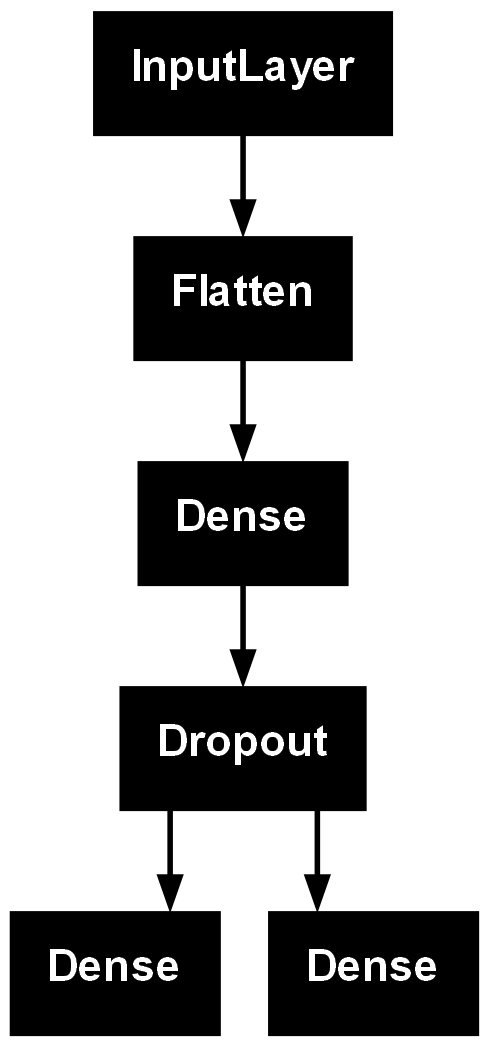

In [28]:
tf.keras.utils.plot_model(new_model_functional_api, "functional_api.png")

## 轉換為 JSON 格式

In [29]:
# 取得模型結構
json_config = model.to_json()

# 載入模型結構
new_model = tf.keras.models.model_from_json(json_config)

## 取得模型權重

In [30]:
# 取得模型權重
weights = model.get_weights()
weights

[array([[ 0.00863807, -0.05162293,  0.03823399, ..., -0.06730623,
         -0.01548408,  0.03101765],
        [-0.06958523,  0.02127659, -0.04288541, ..., -0.0591712 ,
         -0.05968496,  0.01133731],
        [-0.04367283,  0.01447426,  0.05447525, ...,  0.02104563,
          0.00363097,  0.00418943],
        ...,
        [ 0.05171736,  0.00202423, -0.06680024, ..., -0.06254663,
         -0.00597779,  0.02840874],
        [ 0.04386986, -0.0101734 , -0.00880229, ..., -0.04897889,
          0.00658887,  0.07499874],
        [ 0.04795515, -0.0266005 ,  0.02848051, ...,  0.04574697,
         -0.00108682, -0.00063867]], dtype=float32),
 array([-0.04589187,  0.02830372,  0.04345308, -0.02568756, -0.04953612,
        -0.0539914 ,  0.05621956,  0.03277982,  0.08730825, -0.05796518,
        -0.07526677, -0.02716868,  0.07156397,  0.04472436, -0.02732516,
         0.06928091, -0.0033724 , -0.0422749 ,  0.01868529,  0.03942008,
         0.04380888,  0.00306721,  0.04689685, -0.00770034,  0.028

In [31]:
# 設定模型權重
new_model.set_weights(weights)

# predict
score=new_model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.0891004204750061, 0.9729999899864197]